In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
#pd.set_option('mode.chained_assignment', None) # Deshabilita SettingWithCopyWarning. Ojo.


In [3]:

# Cargamos el dataframe
df = pd.read_csv('data/train.csv', index_col='id', parse_dates=['fecha'])


In [4]:

print(f"Shape: {df.shape}")
print(f"Columnas: {df.columns}")
df.head()

Shape: (240000, 22)
Columnas: Index(['titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')


,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,,,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,2.00,80.00,80.00,23533.00,nan,nan,2015-08-23,0.00,0.00,0.00,0.00,0.00,2273000.00
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,2.00,268.00,180.00,24514.00,19.31,-99.23,2013-06-28,0.00,0.00,0.00,1.00,1.00,3600000.00
247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,2.00,144.00,166.00,48551.00,nan,nan,2015-10-17,0.00,0.00,0.00,0.00,0.00,1200000.00
209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,1.00,63.00,67.00,53666.00,19.30,-99.69,2012-03-09,0.00,0.00,0.00,1.00,1.00,650000.00
185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,1.00,95.00,95.00,47835.00,nan,nan,2016-06-07,0.00,0.00,0.00,0.00,0.00,1150000.00


In [5]:
df['tipodepropiedad'].unique()

array(['Apartamento', 'Casa en condominio', 'Casa', 'Terreno',
       'Terreno comercial', 'Local Comercial', 'Quinta Vacacional',
       'Oficina comercial', 'Edificio', 'Casa uso de suelo',
       'Local en centro comercial', 'Bodega comercial', 'Otros', 'Villa',
       'Duplex', 'Inmuebles productivos urbanos',
       'Departamento Compartido', 'Nave industrial', 'Rancho',
       'Terreno industrial', nan, 'Huerta', 'Lote', 'Hospedaje', 'Garage'],
      dtype=object)

In [6]:
df[df.tipodepropiedad == 'Apartamento'].head(10)

,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,,,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,2.00,80.00,80.00,23533.00,nan,nan,2015-08-23,0.00,0.00,0.00,0.00,0.00,2273000.00
185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,1.00,95.00,95.00,47835.00,nan,nan,2016-06-07,0.00,0.00,0.00,0.00,0.00,1150000.00
126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.00,2.00,1.00,1.00,75.00,90.00,23650.00,19.30,-99.15,2014-03-18,0.00,0.00,0.00,0.00,1.00,1100000.00
44962,pre- venta preciosos depas 2 recamaras con sub...,<p>pre-venta de preciosos departamento ecologi...,Apartamento,BUENAVISTA DEPTOS CON SUBSIDIO,Villa de Alvarez,Colima,1.00,2.00,1.00,1.00,58.00,nan,9010.00,nan,nan,2014-01-06,0.00,0.00,0.00,1.00,1.00,310000.00
103293,"departamento en venta, san pedro garza garcia,...","departamento nuevo ,256 m2 de construccion,un ...",Apartamento,NaN,San Pedro Garza García,Nuevo León,nan,3.00,2.00,4.00,256.00,nan,325095.00,nan,nan,2014-12-01,0.00,0.00,0.00,0.00,0.00,7200000.00
73348,"oportunidad, departamento col del valle, 3 rec...",magnifico departamento con excelente distribuc...,Apartamento,Pazaje Santa Cruz,Benito Juárez,Distrito Federal,5.00,3.00,2.00,nan,127.00,127.00,50003995.00,nan,nan,2016-10-30,0.00,0.00,0.00,1.00,1.00,4750000.00
257302,NaN,-- hav1407e-285 -- excelente departamento e...,Apartamento,Rio Mante .,Ciudad Madero,Tamaulipas,0.00,2.00,1.00,1.00,88.00,nan,104721.00,nan,nan,2016-04-08,0.00,0.00,0.00,0.00,0.00,750000.00
127666,hermoso departamento!!!,hermoso departamento con acabados de muy buen ...,Apartamento,LAS COLONIAS,Atizapán de Zaragoza,Edo. de México,20.00,2.00,1.00,2.00,100.00,100.00,55716.00,nan,nan,2015-01-05,0.00,0.00,0.00,1.00,1.00,980000.00
212847,departamento en arcos de zapopan,bonito departamento muy bien ubicado en planta...,Apartamento,ARCO PERTINAX,Zapopan,Jalisco,10.00,2.00,1.00,1.00,84.00,84.00,311049.00,nan,nan,2016-05-22,0.00,0.00,0.00,0.00,0.00,525000.00


In [7]:
df['tipodepropiedad'].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Garage                                1
Hospedaje                             1
Name: tipodepropiedad, dtype: int64

df.groupby(['provincia', 'ciudad']).ciudad.value_counts().nlargest(10)


In [8]:
df['provincia'].value_counts().head(10)

Distrito Federal    58790
Edo. de México      41607
Jalisco             21238
Querétaro           16988
Nuevo León          15324
Puebla              10421
San luis Potosí      8447
Yucatán              7928
Morelos              7337
Veracruz             5762
Name: provincia, dtype: int64

In [9]:
df[df.provincia == 'Distrito Federal'].groupby(['tipodepropiedad']).ciudad.value_counts()

tipodepropiedad     ciudad                
Apartamento         Benito Juárez             8714
                    Cuauhtémoc                4980
                    Miguel Hidalgo            4767
                    Alvaro Obregón            3486
                    Coyoacán                  2116
                    Tlalpan                   1901
                    Cuajimalpa de Morelos     1828
                    Iztapalapa                1412
                    Azcapotzalco              1178
                    Gustavo A. Madero         1105
                    Venustiano Carranza        794
                    Iztacalco                  577
                    Tláhuac                    356
                    La Magdalena Contreras     351
                    Xochimilco                 250
                    otra                        13
Bodega comercial    Iztapalapa                  60
                    Cuauhtémoc                  44
                    Gustavo A. Madero  

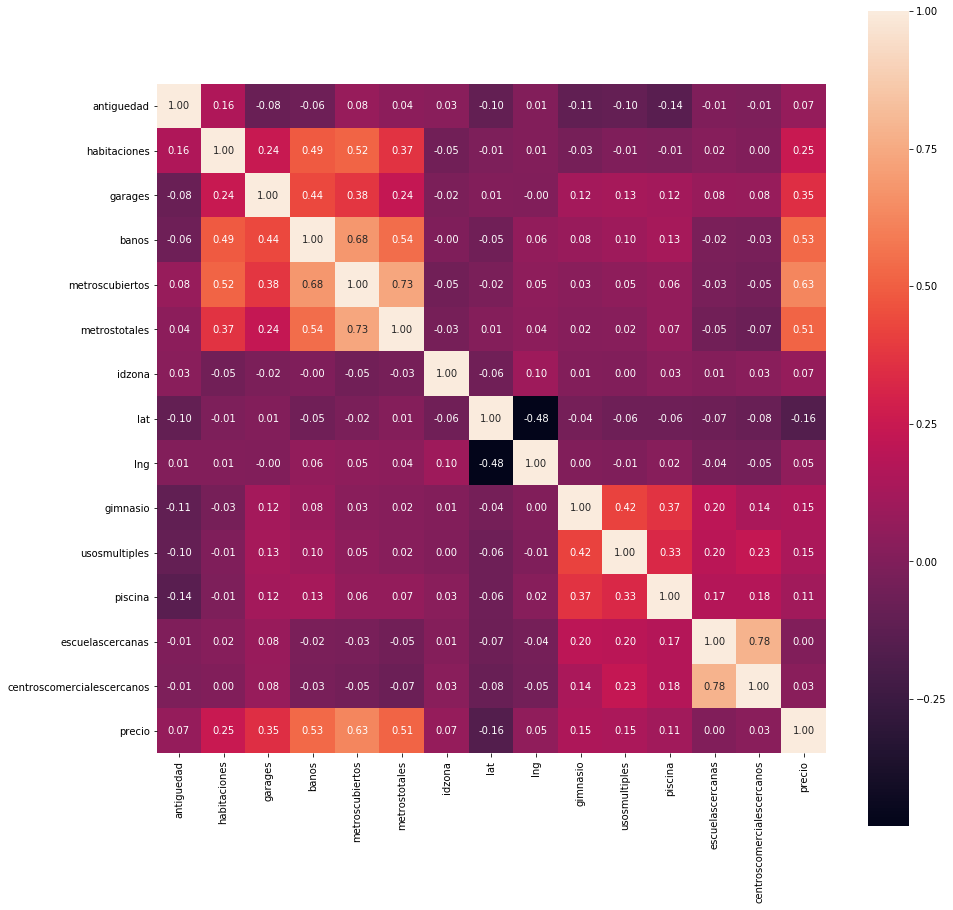

In [10]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f');

In [11]:
df.corr()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
antiguedad,1.00,0.16,-0.08,-0.06,0.08,0.04,0.03,-0.10,0.01,-0.11,-0.10,-0.14,-0.01,-0.01,0.07
habitaciones,0.16,1.00,0.24,0.49,0.52,0.37,-0.05,-0.01,0.01,-0.03,-0.01,-0.01,0.02,0.00,0.25
garages,-0.08,0.24,1.00,0.44,0.38,0.24,-0.02,0.01,-0.00,0.12,0.13,0.12,0.08,0.08,0.35
banos,-0.06,0.49,0.44,1.00,0.68,0.54,-0.00,-0.05,0.06,0.08,0.10,0.13,-0.02,-0.03,0.53
metroscubiertos,0.08,0.52,0.38,0.68,1.00,0.73,-0.05,-0.02,0.05,0.03,0.05,0.06,-0.03,-0.05,0.63
metrostotales,0.04,0.37,0.24,0.54,0.73,1.00,-0.03,0.01,0.04,0.02,0.02,0.07,-0.05,-0.07,0.51
idzona,0.03,-0.05,-0.02,-0.00,-0.05,-0.03,1.00,-0.06,0.10,0.01,0.00,0.03,0.01,0.03,0.07
lat,-0.10,-0.01,0.01,-0.05,-0.02,0.01,-0.06,1.00,-0.48,-0.04,-0.06,-0.06,-0.07,-0.08,-0.16
lng,0.01,0.01,-0.00,0.06,0.05,0.04,0.10,-0.48,1.00,0.00,-0.01,0.02,-0.04,-0.05,0.05
gimnasio,-0.11,-0.03,0.12,0.08,0.03,0.02,0.01,-0.04,0.00,1.00,0.42,0.37,0.20,0.14,0.15


In [12]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

#df = pd.DataFrame({'Correlacion':so.index, 'count':so.values})

print(so[so.values < 1.0].head(25))

centroscomercialescercanos  escuelascercanas             0.78
escuelascercanas            centroscomercialescercanos   0.78
metroscubiertos             metrostotales                0.73
metrostotales               metroscubiertos              0.73
banos                       metroscubiertos              0.68
metroscubiertos             banos                        0.68
                            precio                       0.63
precio                      metroscubiertos              0.63
banos                       metrostotales                0.54
metrostotales               banos                        0.54
banos                       precio                       0.53
precio                      banos                        0.53
habitaciones                metroscubiertos              0.52
metroscubiertos             habitaciones                 0.52
metrostotales               precio                       0.51
precio                      metrostotales                0.51
habitaci

In [13]:
so = df.groupby(by=['provincia','tipodepropiedad']).size().sort_values(kind="quicksort", ascending=False)
#print(so)
#print(so[so.values < 1.0].head(25))

AxesSubplot(0.125,0.125;0.775x0.755)
                    tipodepropiedad  porcentaje
Casa                         141717        0.59
Apartamento                   57341        0.24
Casa en condominio            19297        0.08
Terreno                        9945        0.04
Local Comercial                3055        0.01
Oficina comercial              1741        0.01
Bodega comercial               1406        0.01
Edificio                       1396        0.01
Terreno comercial              1326        0.01
Casa uso de suelo               708        0.00


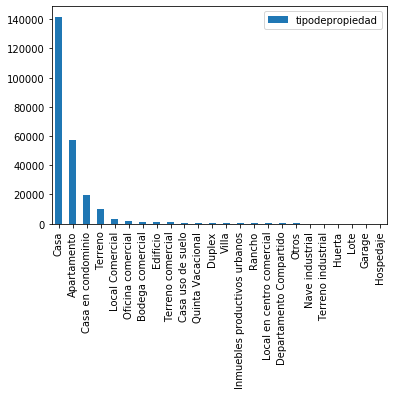

In [14]:
### Tipos de propiedas principales ###
tiposPrincipales = df.tipodepropiedad.value_counts().sort_values(kind="quicksort", ascending=False).to_frame()
print(tiposPrincipales.plot(kind='bar'))
#print(tiposPrincipales.values)
tiposPrincipales['porcentaje'] = tiposPrincipales.values / tiposPrincipales.values.sum()
#print(tiposPrincipales.porcentaje)
print(tiposPrincipales.head(10))

In [16]:
df[df.tipodepropiedad.isin(tiposPrincipales.head(5).tipodepropiedad.index)].info

<bound method DataFrame.info of                                                    titulo  \
id                                                          
254099                                  depto. tipo a-402   
53461                      condominio horizontal en venta   
247984              casa en venta urbi 3 recamaras tonala   
209067  casa sola en toluca zinacantepec con credito i...   
185997                                     paseos del sol   
126147                     departamento en venta taxqueña   
139233                 de oportunidad casa en san lorenzo   
5013    casa emilia en venta en selvamar playa del carmen   
44962   pre- venta preciosos depas 2 recamaras con sub...   
134537                                            terreno   
51180                                       mi 2° credito   
103293  departamento en venta, san pedro garza garcia,...   
47890              hermosa casa en zibata queretaro 170m²   
130216                 casa matias romero - sión banc

In [15]:
    df[df.tipodepropiedad.isin(tiposPrincipales.head(5).tipodepropiedad.index)].groupby(['provincia']).tipodepropiedad.value_counts()
    #print(tiposPrincipales.head(5).tipodepropiedad.index)

provincia              tipodepropiedad   
Aguascalientes         Casa                  1340
                       Casa en condominio     197
                       Terreno                 86
                       Apartamento             47
                       Local Comercial         31
Baja California Norte  Casa                  2769
                       Apartamento            196
                       Casa en condominio     166
                       Terreno                 24
                       Local Comercial         17
Baja California Sur    Casa                  1473
                       Apartamento             82
                       Terreno                 52
                       Casa en condominio      34
                       Local Comercial         21
Campeche               Casa                   210
                       Terreno                 20
                       Casa en condominio      11
                       Apartamento              7
        

In [16]:
df[df.tipodepropiedad.isin(tiposPrincipales.head(5).tipodepropiedad.index)].groupby(['provincia']).tipodepropiedad.value_counts()
#print(tiposPrincipales.head(5).tipodepropiedad.index)

provincia              tipodepropiedad   
Aguascalientes         Casa                  1340
                       Casa en condominio     197
                       Terreno                 86
                       Apartamento             47
                       Local Comercial         31
Baja California Norte  Casa                  2769
                       Apartamento            196
                       Casa en condominio     166
                       Terreno                 24
                       Local Comercial         17
Baja California Sur    Casa                  1473
                       Apartamento             82
                       Terreno                 52
                       Casa en condominio      34
                       Local Comercial         21
Campeche               Casa                   210
                       Terreno                 20
                       Casa en condominio      11
                       Apartamento              7
        

In [17]:
df['amenities'] = df.gimnasio + df.usosmultiples + df.piscina #+ df.escuelascercanas + df.centroscomercialescercanos
df['plus']  = df.habitaciones + df.banos + df.garages + df.gimnasio + df.usosmultiples + df.piscina + df.escuelascercanas + df.centroscomercialescercanos

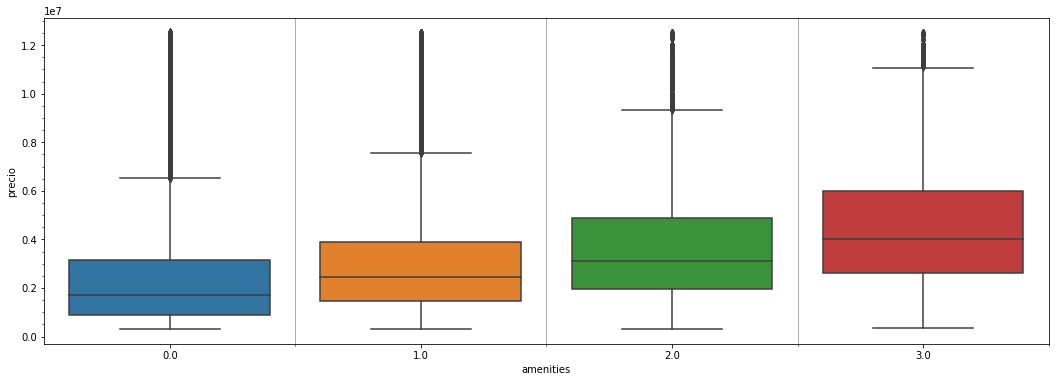

In [18]:
# df[['amenities', 'precio']].plot(x ='amenities', y='precio', kind = '')
dfProps = df[df.tipodepropiedad.isin(tiposPrincipales.head(5).tipodepropiedad.index)]

from matplotlib.ticker import AutoMinorLocator
fig = plt.figure(figsize=(18,6))
ax1 = sns.boxplot('amenities', "precio", data=dfProps) #, hue='modelLine')
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(which='minor', axis='x', linewidth=1)

In [ ]:
# Barras desmembrando eso
# Distribucion amenities
#df[['gimnasio', 'usosmultiples', 'piscina', 'amenities']].groupby('amenities').sum().plot(kind='bar');
# Precio vs amenities
#df[['amenities', 'precio']].groupby('amenities').agg({'precio':np.mean}).plot(kind='bar');

from pandas.plotting import parallel_coordinates

# Plot
plt.figure(figsize=(12,9), dpi= 80)
parallel_coordinates(df[['gimnasio', 'usosmultiples', 'piscina', 'amenities']], 'amenities', colormap='Dark2')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Parallel Coordinated of Diamonds', fontsize=22)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


KeyboardInterrupt: 

In [ ]:
df['amenities'].head()

In [ ]:
# df[['amenities', 'precio']].plot(x ='amenities', y='precio', kind = '')
dfProps = df[df.tipodepropiedad.isin(tiposPrincipales.head(5).tipodepropiedad.index)]

from matplotlib.ticker import AutoMinorLocator
fig = plt.figure(figsize=(18,6))
ax1 = sns.boxplot('plus', "precio", data=dfProps) #, hue='modelLine')
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(which='minor', axis='x', linewidth=1)

In [ ]:
df['banos-metros'] = df['metroscubiertos'] / df['banos']

fig, ax =plt.subplots(1,2)
sns.barplot(x=df['banos-metros'],y=df['precio'],ax=ax[0])
# sns.barplot(x=df['gimnasio'],y=df['precio_usd'],ax=ax[1])
fig.show()